# Pull in dataset, cleaning it, and splitting it.

In [4]:
import pandas as pd 
import sklearn
from sklearn.model_selection import StratifiedShuffleSplit



#initialize to use for later
wine_train_set=0
wine_test_set=0
#code is the same as from over on the initial exploration notebook.
dataframe = pd.read_csv("winequality-white.csv")
dataframeCopy = dataframe.copy()
dataframeCopy.dropna(axis='index', how='any', inplace=True)
dataframeCopy.dropna(axis='columns', how='any', inplace=True)

#stratifying data on quality to predict it
#reverted the test size
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=456)

for train_indices, test_indices in splitter.split(dataframeCopy, dataframeCopy["quality"]):
    wine_train_set = dataframeCopy.iloc[train_indices]
    wine_test_set = dataframeCopy.iloc[test_indices]
    

workingset=wine_train_set.copy()
testingset=wine_test_set.copy()

# Clustering

In [13]:
#import for Clustering as pert the K-means clustering Slides.
from sklearn.cluster import KMeans
import math


#buuld classifier and X before fitting
kmeans_classifier = KMeans(n_clusters=7, n_init=20)

X= workingset[["residual sugar", "alcohol", "density","chlorides","volatile acidity", "fixed acidity", "sulphates", "pH"]]


#fit and printout attribrutes.
kmeans_classifier.fit(X)
print("Centroids are:", kmeans_classifier.cluster_centers_)
print("The final distortion is:", kmeans_classifier.inertia_)
print(kmeans_classifier.labels_)
RMS_average = math.sqrt(kmeans_classifier.inertia_ / len(X))
print("Averaging and taking the square root gives ", RMS_average)

#print out closest cluster centroid.
new_instance = workingset[["residual sugar", "alcohol", "density","chlorides","volatile acidity", "fixed acidity", "sulphates", "pH" ]]
class_out = kmeans_classifier.predict(new_instance)
print("The predicted class:", class_out)



Centroids are: [[1.30032258e+01 9.56736243e+00 9.97497495e-01 4.93282732e-02
  2.80407970e-01 7.00132827e+00 4.99829222e-01 3.13762808e+00]
 [2.20665635e+00 1.21550052e+01 9.90346494e-01 3.60433437e-02
  2.83761610e-01 6.51455108e+00 4.97260062e-01 3.21518576e+00]
 [5.65348331e+00 1.07843880e+01 9.93448331e-01 4.55152395e-02
  2.86335269e-01 6.72467344e+00 4.81320755e-01 3.20898403e+00]
 [8.90639445e+00 1.01596251e+01 9.95380755e-01 4.68582435e-02
  2.92280431e-01 6.95069337e+00 4.70847458e-01 3.16855162e+00]
 [1.72881743e+01 9.34266943e+00 9.99167884e-01 4.99253112e-02
  2.67074689e-01 6.91161826e+00 4.96265560e-01 3.14863071e+00]
 [1.58614130e+00 1.02546558e+01 9.92801087e-01 4.92793478e-02
  2.61016304e-01 7.00135870e+00 4.96315217e-01 3.21538043e+00]
 [6.58000000e+01 1.17000000e+01 1.03898000e+00 7.40000000e-02
  9.65000000e-01 7.80000000e+00 6.90000000e-01 3.39000000e+00]]
The final distortion is: 9350.752692920545
[2 1 1 ... 3 3 3]
Averaging and taking the square root gives  1.59

# Dimensional Analysis

In [46]:
# Part 2 Do dimensional Analysis

#imports for everything in this section
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


pca = PCA()
X_2D = pca.fit_transform(X)


print(pca.explained_variance_ratio_)
cumulative_sums = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_sums)
d = np.argmax(cumulative_sums >= 0.95) + 1
print("The number of dimensions that explain 95% of the variation: ",d)
d_values = [i+1 for i in range(0,len(cumulative_sums))]



#scaling the x and y's so warnings stop being thrown
scaler = StandardScaler()



#define working variables for pca to working with 
X_train = workingset[["residual sugar", "alcohol", "density","chlorides","volatile acidity", "fixed acidity", "sulphates", "pH"]]
y_train = workingset["quality"]

X_test = testingset[["residual sugar", "alcohol", "density","chlorides","volatile acidity", "fixed acidity", "sulphates", "pH"]]
y_test = testingset["quality"]



workingSet_pca = PCA(n_components=8)
workinSet_model = SVC(random_state = 29, max_iter=500, tol=0.1)

myPipe = Pipeline([
    ('pca', workingSet_pca),
    ('svc', workinSet_model)
])

print(myPipe)
myPipe.fit(X_train, y_train)


y_predicted = myPipe.predict(X_train)
matrix = confusion_matrix(y_train, y_predicted)
print("metrics for the training set being here")
print(matrix)


print ("Accuracy is ", accuracy_score(y_train, y_predicted))

# We have to specify how to combine for the multiclassifications
print ("Precision is ", precision_score(y_train, y_predicted, zero_division=0.0, average="weighted"))
print ("Sensitivity is ", recall_score(y_train, y_predicted, average="weighted"))
print ("F1 is ", f1_score(y_train, y_predicted, average="weighted"))

print("metrics for the testing set being here")
y_predicted = myPipe.predict(X_test)
matrix = confusion_matrix(y_test, y_predicted)
print(matrix)
print ("Accuracy is ", accuracy_score(y_test, y_predicted))

# We have to specify how to combine for the multiclassifications
print ("Precision is ", precision_score(y_test, y_predicted, zero_division=0.0, average="weighted"))
print ("Sensitivity is ", recall_score(y_test, y_predicted, average="weighted"))
print ("F1 is ", f1_score(y_test, y_predicted, average="weighted"))


[9.31585186e-01 4.26490912e-02 2.42924592e-02 6.84558285e-04
 4.12048726e-04 3.62035853e-04 1.46081379e-05 1.29531096e-08]
[0.93158519 0.97423428 0.99852674 0.99921129 0.99962334 0.99998538
 0.99999999 1.        ]
The number of dimensions that explain 95% of the variation:  2
Pipeline(steps=[('pca', PCA(n_components=8)),
                ('svc', SVC(max_iter=500, random_state=29, tol=0.1))])


C:\Users\s529027\Documents\GitHub\ml-s24-project-DerekVolner\ds-venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


metrics for the training set being here
[[  0   0  10   4   1   0   0]
 [  0   0  97  25   0   0   0]
 [  0   0 761 328   4   0   0]
 [  0   0 937 696  15   0   0]
 [  0   0 256 389  15   0   0]
 [  0   0  32  96   3   0   0]
 [  0   0   2   2   0   0   0]]
Accuracy is  0.40076231962973047
Precision is  0.38180353671768685
Sensitivity is  0.40076231962973047
F1 is  0.3457010923605732
metrics for the testing set being here
[[  0   0   4   1   0   0   0]
 [  0   0  31  10   0   0   0]
 [  0   0 259 104   1   0   0]
 [  0   0 305 239   6   0   0]
 [  0   0  71 146   3   0   0]
 [  0   0  18  26   0   0   0]
 [  0   0   0   1   0   0   0]]
Accuracy is  0.4089795918367347
Precision is  0.36935494677991226
Sensitivity is  0.4089795918367347
F1 is  0.35026535687366517


#### Actual analysis of the metrics and the PCA 

- it seems the the first feature X, which is defined in the clustering section, and states the residual sugar explains about 93.16% of the variation in the data
- then another 4% on top of that from the second feature in X, that being alcohol, combined with the first feature explains about 97.42% of the variation in the data
- another 2.43% is explained by the third feature in X, which is density, combined with the other features percentages we get about 99.85% of the variation in the data explained by these 3


# Vizualization and Narrative of Data Predictively

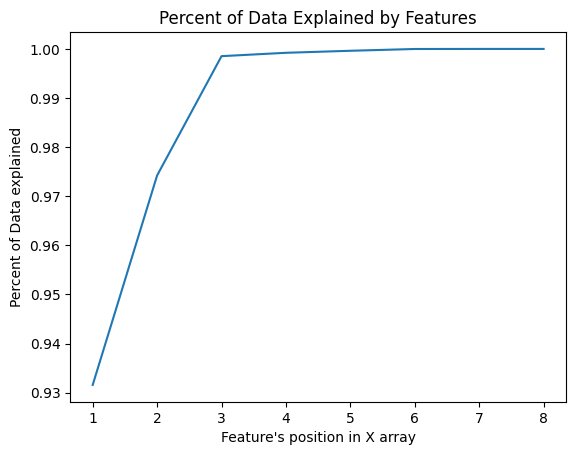

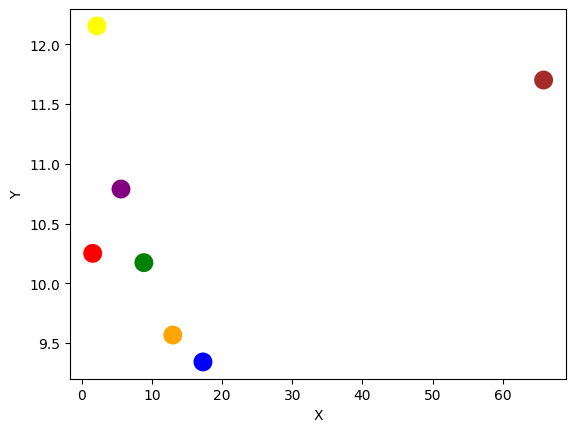

In [67]:


#this is the exact same graph as above but I'm uncertain of whether it should just be in this section, the one above or if both is fine.
plt.title("Percent of Data Explained by Features")
plt.ylabel("Percent of Data explained")
plt.xlabel("Feature's position in X array")
plt.plot(d_values, cumulative_sums)
plt.show()


centoridPlacements= kmeans_classifier.cluster_centers_

centroids_x = centoridPlacements[:,0]
centroids_y = centoridPlacements[:,1]
# the code for the centroids part is being adapted from: https://stackoverflow.com/questions/61181342/how-to-graph-centroids-with-kmeans
# because the code from the slides wasn't working to print out stuff for the dataset so far as I could tell

plt.scatter(centroids_x,centroids_y,marker = ".", s=175,linewidths = 7, zorder = 100,  c=['green', 'red','blue','yellow','orange','purple','brown'])

plt.xlabel("X")
plt.ylabel("Y")
plt.show()



### Predictive Narrative for the first graph: 
  - The features other than the first 3 features result in less than 1% of the variation being explained in the data, this is partly why the graph on the y axis starts at 0.93, changes sharply once for the next 4%, then a second sharp turn for another 2.43% and then tapers off above 99.85%
  - Predictively speaking if we add more features I think it would result in small and >1% increase in features explaining variance in data because the first feature in x which in this case is residual sugar already explains about 93% of the variance in the data while the rest don't nearly contributed nearly as much to the variance past the third.
### Predictive Narrative for the second graph:
  -  I believe if we added more features from the dataset it should result in clusters in the x-range of about 0-17 and y ranges of about 0-10, the reson is for this is because currently are data is clustering around these numbers with 2 outliers I will talk about in the next section for anomolous data.
     - I am not super sure how to graph the centroids for the the data I have as the notes for kmeans.ipynb has code for data that is defined within the program rather then a dataset, might be a scaling issue but I was having issues attempting to scale the data.
     - the code for the centroids part is being adapted from: https://stackoverflow.com/questions/61181342/how-to-graph-centroids-with-kmeans

# Anomolous data

 x of brown: 65.8  y of brown11.7,   x of red: 13.00322581

# Advanced Regression/Classifer Tools